In [1]:
import geopandas
df = geopandas.read_file("Boundaries - Community Areas (current)/geo_export_b549c22f-3ace-43d8-9399-2f6277a2f4a7.shp")

In [2]:
df

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,POLYGON ((-87.60914087617894 41.84469250265398...
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,POLYGON ((-87.59215283879394 41.81692934626684...
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,POLYGON ((-87.62879823733725 41.80189303368919...
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.6067081256125 41.81681377057218,..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,POLYGON ((-87.59215283879394 41.81692934626684...
5,0.0,4,4,0.0,0.0,LINCOLN SQUARE,0.0,7.135233e+07,36624.603085,"POLYGON ((-87.6744075678037 41.97610340441675,..."
6,0.0,40,40,0.0,0.0,WASHINGTON PARK,0.0,4.237388e+07,28175.316087,"POLYGON ((-87.60603749217005 41.7858740649942,..."
7,0.0,41,41,0.0,0.0,HYDE PARK,0.0,4.510538e+07,29746.708202,POLYGON ((-87.58037662085418 41.80252502205126...
8,0.0,42,42,0.0,0.0,WOODLAWN,0.0,5.781518e+07,46936.959244,POLYGON ((-87.57714456891335 41.78614641013439...
9,0.0,1,1,0.0,0.0,ROGERS PARK,0.0,5.125990e+07,34052.397576,POLYGON ((-87.65455590025104 41.99816614970252...


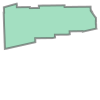

In [3]:
df["geometry"][29]

In [4]:
import shapely

In [30]:
a = shapely.geometry.Point(-87.726214213,41.860110336)

In [5]:
def imputation(point):
    st = point.split(", ")
    res = tuple([float(st[0][1:-1]), float(st[1][:-1])]) 
    x,y = res
    point = shapely.geometry.Point(y,x)

    for i in range(77):
         if point.within(df["geometry"][i]):
            return i


In [6]:
import pandas as pd

In [42]:
df1 = pd.read_csv("Crimes_-_2008.csv")

In [43]:
df1.shape

(427099, 18)

In [36]:
df1.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,JD406529,10/14/2009 12:01:00 AM,018XX E 79TH ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,False,414,8.0,17,NaN,NaN,2009,NaN,NaN,NaN
1,HR511154,08/27/2009 07:00:00 PM,068XX S ROCKWELL ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,17.0,05,1160219.0,1859200.0,2009,41.769345,-87.688269,"(41.769345063, -87.688268624)"
2,HR164822,02/11/2009 02:15:00 AM,116XX S WESTERN AVE,0610,BURGLARY,FORCIBLE ENTRY,TAVERN / LIQUOR STORE,False,False,2212,19.0,05,1162481.0,1827477.0,2009,41.682245,-87.680859,"(41.682245182, -87.680858516)"
3,HR480283,08/12/2009 07:54:00 PM,110XX S NORMAL AVE,041A,BATTERY,AGGRAVATED - HANDGUN,RESIDENCE - YARD (FRONT / BACK),False,False,2233,34.0,04B,1174923.0,1831812.0,2009,41.693873,-87.635185,"(41.693873492, -87.635184914)"
4,JC383791,10/23/2009 03:14:00 PM,022XX N MAPLEWOOD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,1431,1.0,02,NaN,NaN,2009,NaN,NaN,NaN


In [44]:
df1.dropna(inplace=True)

In [45]:
c_area = df1["Location"].apply(imputation)

In [46]:
c_area

0         46.0
4         37.0
6         21.0
12        64.0
13        17.0
16        24.0
17        24.0
18        16.0
19        64.0
20        65.0
21        65.0
22        64.0
25        65.0
27        65.0
28        64.0
29        66.0
30        65.0
32         8.0
36         NaN
37         0.0
135       28.0
136       28.0
137       38.0
140       69.0
142       64.0
143       28.0
144       24.0
146       54.0
149        8.0
150       38.0
          ... 
427069    56.0
427070    65.0
427071    36.0
427072    37.0
427073     4.0
427074    41.0
427075    54.0
427076    29.0
427077    64.0
427078    51.0
427079    46.0
427080    30.0
427081    30.0
427082    26.0
427083    73.0
427084    64.0
427085    49.0
427086     3.0
427087    25.0
427088    65.0
427089    66.0
427090    22.0
427091    64.0
427092    18.0
427093    18.0
427094    29.0
427095    73.0
427096     0.0
427097    13.0
427098     NaN
Name: Location, Length: 420026, dtype: float64

In [48]:
df1["Community Area"] = c_area

In [49]:
df1.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Community Area
0,HP685051,11/15/2008 03:15:00 PM,111XX S EMERALD AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,2233,34.0,04B,1173301.0,1830990.0,2008,41.691654,-87.641148,"(41.691653719, -87.641147626)",46.0
4,HP454718,07/14/2008 04:55:00 PM,0000X W WACKER DR,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,111,42.0,02,1175668.0,1902130.0,2008,41.886817,-87.630352,"(41.886816689, -87.630352182)",37.0
6,HP604352,10/02/2008 01:00:00 AM,030XX N ELSTON AVE,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESTAURANT,False,False,1411,33.0,05,1158344.0,1919943.0,2008,41.936069,-87.693482,"(41.936068795, -87.693482433)",21.0
12,HP621271,10/11/2008 11:35:00 AM,057XX S ASHLAND AVE,031A,ROBBERY,ARMED: HANDGUN,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,True,False,715,16.0,03,1166652.0,1866697.0,2008,41.789783,-87.664474,"(41.789782964, -87.664474393)",64.0
13,HR100700,12/31/2008 06:30:00 PM,031XX N HARLEM AVE,0610,BURGLARY,FORCIBLE ENTRY,CAR WASH,False,False,2511,29.0,05,1127536.0,1920002.0,2008,41.936806,-87.806705,"(41.936805842, -87.806705197)",17.0


In [14]:
df1.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location', 'Community Area'],
      dtype='object')

In [15]:
lst =['Date','IUCR', 'Primary Type','Location Description', 'Arrest', 'Domestic','Beat',
       'Ward', 'FBI Code','Year','Community Area']

In [50]:
df1[lst].reset_index(drop = True).to_csv("Crimes_-_2008.csv", index = False)

In [ ]:
# drop columns

In [55]:
for i in range(12,21):
    s = "Crimes_-_20"+str(i)+".csv"
    df1 = pd.read_csv(s)
    df1[lst].reset_index(drop = True).to_csv(s, index = False)

[12, 13, 14, 15, 16, 17, 18, 19]

In [60]:
d1 = pd.read_csv("Crimes_-_2008.csv")

In [61]:
d1.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,Year,Community Area
0,11/15/2008 03:15:00 PM,041A,BATTERY,STREET,False,False,2233,34.0,04B,2008,46.0
1,07/14/2008 04:55:00 PM,0281,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,False,111,42.0,02,2008,37.0
2,10/02/2008 01:00:00 AM,0630,BURGLARY,RESTAURANT,False,False,1411,33.0,05,2008,21.0
3,10/11/2008 11:35:00 AM,031A,ROBBERY,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,True,False,715,16.0,03,2008,64.0
4,12/31/2008 06:30:00 PM,0610,BURGLARY,CAR WASH,False,False,2511,29.0,05,2008,17.0


In [67]:
d1.shape

(420026, 11)

In [137]:
d2 = pd.read_csv("Crimes_-_2020.csv")

In [138]:
d2.tail()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,Year,Community Area
139386,1/01/2020 1:24,486,BATTERY,APARTMENT,False,True,823,16.0,08B,2020,66
139387,1/01/2020 3:00,486,BATTERY,APARTMENT,False,True,1523,37.0,08B,2020,25
139388,1/01/2020 14:13,486,BATTERY,RESIDENCE,False,False,2023,48.0,08B,2020,77
139389,1/01/2020 4:07,486,BATTERY,APARTMENT,False,True,722,6.0,08B,2020,69
139390,1/01/2020 15:00,560,ASSAULT,APARTMENT,False,True,1433,32.0,08A,2020,24


In [139]:
d2.shape

(139391, 11)

In [140]:
all_df = pd.concat([all_df, d2])

In [141]:
all_df.tail()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,Year,Community Area
139386,1/01/2020 1:24,486,BATTERY,APARTMENT,False,True,823,16.0,08B,2020,66.0
139387,1/01/2020 3:00,486,BATTERY,APARTMENT,False,True,1523,37.0,08B,2020,25.0
139388,1/01/2020 14:13,486,BATTERY,RESIDENCE,False,False,2023,48.0,08B,2020,77.0
139389,1/01/2020 4:07,486,BATTERY,APARTMENT,False,True,722,6.0,08B,2020,69.0
139390,1/01/2020 15:00,560,ASSAULT,APARTMENT,False,True,1433,32.0,08A,2020,24.0


In [142]:
all_df.shape

(3916242, 11)

In [143]:
all_df["Year"].value_counts()

2008    420026
2009    386040
2010    369975
2011    351068
2012    336140
2013    307301
2014    275551
2016    269418
2017    268652
2018    268198
2015    264436
2019    260046
2020    139391
Name: Year, dtype: int64

In [144]:
#all_df.reset_index(drop = True).to_csv("combined_data.csv", index = False)

In [145]:
all_df.shape

(3916242, 11)

In [148]:
all_df.dropna().shape

(3905294, 11)

In [149]:
all_df.dropna().drop_duplicates().shape

(3893886, 11)

In [150]:
all_clean = all_df.dropna().drop_duplicates()

In [151]:
#all_clean.reset_index(drop = True).to_csv("processed_combined_data.csv", index = False)

In [ ]:
#drop na

In [ ]:
for i in range(12,21):
    s = "Crimes_-_20"+str(i)+".csv"
    df1 = pd.read_csv(s)
    df1[lst].reset_index(drop = True).to_csv(s, index = False)

In [57]:
"{:02d}".format(1)

'01'

In [13]:
df1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Community Area
2,7886775,HT116711,01/12/2011 04:21:00 PM,133XX S BRAINARD AVE,031A,ROBBERY,ARMED - HANDGUN,SMALL RETAIL STORE,False,False,433,10.0,03,1197792.0,1817144.0,2011,41.653084,-87.551944,"(41.653083749, -87.55194424)",53.0
3,8351368,HT583872,11/10/2011 08:32:00 PM,056XX W DIVISION ST,031A,ROBBERY,ARMED - HANDGUN,GROCERY FOOD STORE,False,False,2531,29.0,03,1138659.0,1907439.0,2011,41.902137,-87.766131,"(41.902136786, -87.76613137)",25.0
5,8131804,HT366270,06/26/2011 03:00:00 AM,054XX N WAYNE AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE - GARAGE,False,False,2013,48.0,05,1166328.0,1936224.0,2011,41.980577,-87.663673,"(41.980577256, -87.663672999)",75.0
6,8371394,HT604757,11/20/2011 06:00:00 PM,024XX N MARMORA AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,False,2515,30.0,02,1136649.0,1915674.0,2011,41.924771,-87.773317,"(41.924770833, -87.773317002)",18.0
10,8198899,HT426399,08/01/2011 03:00:00 AM,045XX N CENTRAL PARK AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,1723,33.0,02,1151573.0,1929847.0,2011,41.963382,-87.718105,"(41.963382081, -87.718105325)",13.0


In [65]:
test = df1.head()["Location"][0]

In [68]:
st = test.split(", ")
res = tuple([float(st[0][1:-1]), float(st[1][:-1])]) 

In [81]:
df1.tail(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
336130,9977137,HY165844,01/30/2012 08:00:00 AM,081XX S DR MARTIN LUTHER KING JR DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44.0,11,1180319.0,1851022.0,2012,02/09/2018 03:44:29 PM,41.746466,-87.614842,"(41.746466445, -87.614841984)"
336131,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
336132,9981793,HY171326,01/20/2012 12:01:00 AM,007XX E 132ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,9.0,54.0,11,1183574.0,1818013.0,2012,02/09/2018 03:44:29 PM,41.655810,-87.603939,"(41.655810306, -87.603939386)"
336133,9982230,HY171649,01/01/2012 12:00:00 PM,134XX S HOUSTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,10.0,55.0,11,1198768.0,1816544.0,2012,02/09/2018 03:44:29 PM,41.651413,-87.548393,"(41.651412947, -87.548393189)"
336134,9983996,HY173580,09/01/2012 10:00:00 AM,040XX W HIRSCH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,37.0,23.0,02,1149145.0,1909014.0,2012,02/09/2018 03:44:29 PM,41.906262,-87.727574,"(41.906262034, -87.727573533)"
336135,9984444,HY173771,10/11/2012 06:00:00 AM,076XX S COLFAX AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,7.0,43.0,11,1194850.0,1854806.0,2012,02/10/2018 03:50:01 PM,41.756505,-87.561474,"(41.756504746, -87.561473501)"
336136,9987208,HY177204,12/15/2012 09:00:00 AM,067XX S PERRY AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,6.0,69.0,07,1176558.0,1860300.0,2012,02/10/2018 03:50:01 PM,41.772012,-87.628344,"(41.772011702, -87.628344479)"
336137,9990541,HY180702,02/07/2012 09:00:00 AM,010XX N HONORE ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,1.0,24.0,11,1163877.0,1906994.0,2012,02/09/2018 03:44:29 PM,41.900421,-87.673514,"(41.900420776, -87.673514317)"
336138,9991722,HY181590,04/01/2012 12:01:00 AM,019XX S DRAKE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,24.0,29.0,11,1153060.0,1890087.0,2012,02/09/2018 03:44:29 PM,41.854248,-87.713694,"(41.854247595, -87.713694133)"
336139,9998136,HY188115,01/01/2012 09:00:00 AM,045XX W WRIGHTWOOD AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,31.0,20.0,11,1145496.0,1917131.0,2012,02/09/2018 03:44:29 PM,41.928606,-87.740772,"(41.928605829, -87.740771814)"


In [71]:
res 

(41.91156877, -87.765584963)